In [1]:
# !pip install opencv-python
# !pip uninstall opencv-python
!pip install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 87.4 MB/s eta 0:00:00a 0:00:01


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 16x16のバイナリ画像を生成（白い四角形が2つ）
binary_image = np.array([
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 1, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
# binary_image[2:6, 2:6] = 1
# binary_image[10:14, 8:12] = 1

# findContoursを使って輪郭を検出
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)

# 結果を表示
print(contours, hierarchy)


(array([[[1, 4]],

       [[4, 2]],

       [[6, 4]],

       [[4, 2]]], dtype=int32),) [[[-1 -1 -1 -1]]]


(array([[[1, 3]],

       [[3, 2]],

       [[6, 4]],

       [[4, 2]]], dtype=int32),) [[[-1 -1 -1 -1]]]
0.23664648056030274


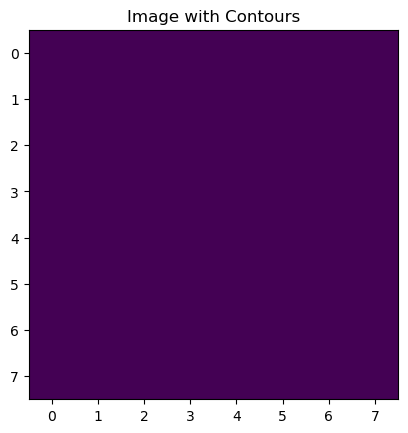

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 16x16のバイナリ画像を生成（白い四角形が2つ）
binary_image = np.array([
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 0, 0, 0],
                [0, 1, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 0, 0, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
# OpenCVで画像を1チャンネルのグレースケールに変換
# gray_image = cv2.cvtColor(binary_image * 255, cv2.COLOR_BGR2GRAY)

# Zhang-Suen アルゴリズムを適用
skeleton = cv2.ximgproc.thinning(binary_image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# # 結果を表示
# plt.imshow(skeleton, cmap='gray')
# plt.title('Thinned Image')
# plt.show()

# binary_image[2:6, 2:6] = 1
# binary_image[10:14, 8:12] = 1

# findContoursを使って輪郭を検出
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)

# 結果を表示
print(contours, hierarchy)

# 輪郭を検出
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)

# 各輪郭に対して処理
for contour in contours:
    # 輪郭を近似
    epsilon = 0.02 * cv2.arcLength(contour, True)
    print(epsilon)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # 近似された輪郭が直線であるか判定
    if len(approx) == 2:
        print("直線が検出されました.")

# 検出された輪郭を描画して表示
image_with_contours = cv2.cvtColor(binary_image * 255, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# OpenCVのimshowはJupyter上では直接動作しないため、Matplotlibを使用
plt.imshow(image_with_contours)
plt.title('Image with Contours')
plt.show()

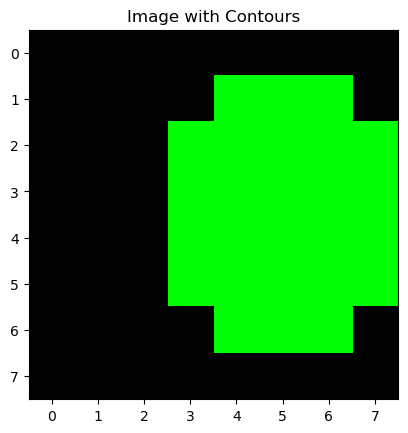

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 8x8のバイナリ画像を作成（曲線を含む）
binary_image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

# 輪郭を検出
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 検出された輪郭に対して処理
for contour in contours:
    # 輪郭が面であるか判定
    if cv2.isContourConvex(contour):
        continue  # 面を無視
    # 輪郭を近似
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # 長方形でないかつ、近似された輪郭が曲線であるか判定
    if len(approx) > 2:
        print("曲線が検出されました.")

# 検出された輪郭を描画して表示
image_with_contours = cv2.cvtColor(binary_image * 255, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# OpenCVのimshowはJupyter上では直接動作しないため、Matplotlibを使用
plt.imshow(image_with_contours)
plt.title('Image with Contours')
plt.show()


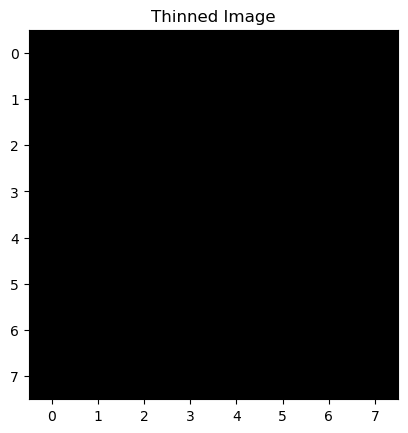

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 8x8のバイナリ画像を作成
binary_image = np.array([
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0]], dtype=np.uint8)

# 画像を反転させる
binary_image = 1 - binary_image

binary_image = cv2.bitwise_not(binary_image)
# Zhang-Suen アルゴリズムを適用
skeleton = cv2.ximgproc.thinning(binary_image)

# 結果を表示
plt.imshow(skeleton, cmap='gray')
plt.title('Thinned Image')
plt.show()

[ WARN:0@633.512] global loadsave.cpp:248 findDecoder imread_('path/to/your/image.jpg'): can't open/read file: check file path/integrity


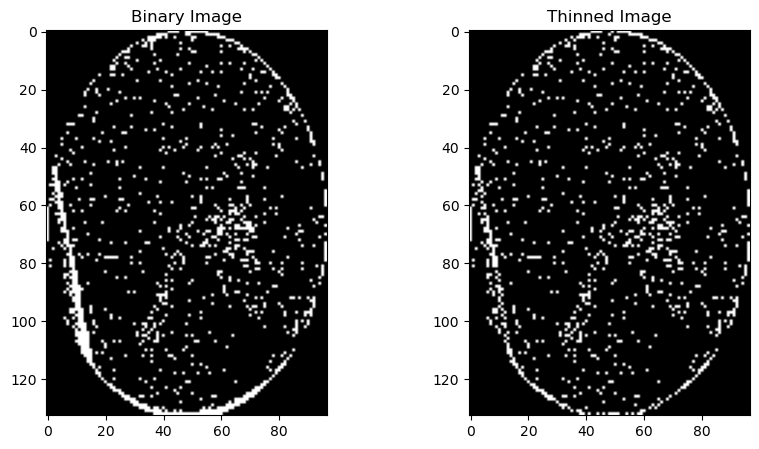

In [4]:
# 必要なライブラリをインポート
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd # https://pandas.pydata.org/

# 画像を読み込む
image_path = 'path/to/your/image.jpg'  # 画像のパスを指定してください
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

df = pd.read_pickle("../input/LSWMD_25519.pkl")
original_image = df.waferMap[8499]

# 二値化処理を行う
_, binary_image = cv2.threshold(original_image, 1, 255, cv2.THRESH_BINARY)

# 細線化処理を行う関数
def thinning(image):
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)

    ret, img = cv2.threshold(image, 128, 255, 0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(img, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros == size:
            done = True

    return skel

# 細線化処理を実行
thinned_image = thinning(binary_image)

# 結果を表示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')

plt.subplot(1, 2, 2)
plt.imshow(thinned_image, cmap='gray')
plt.title('Thinned Image')

plt.show()


Loc


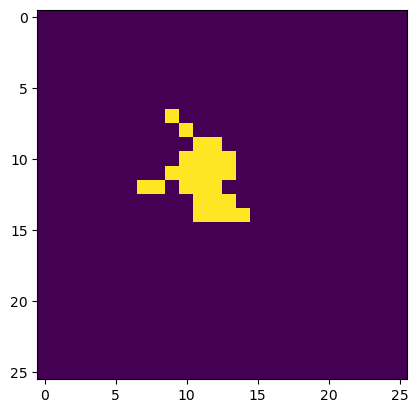

0.6


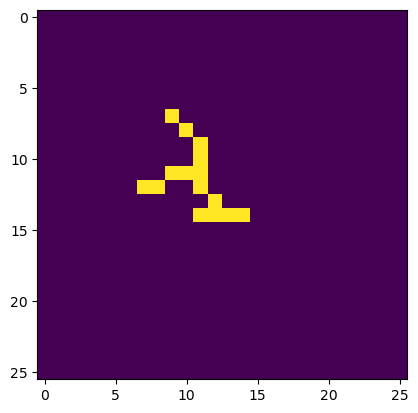

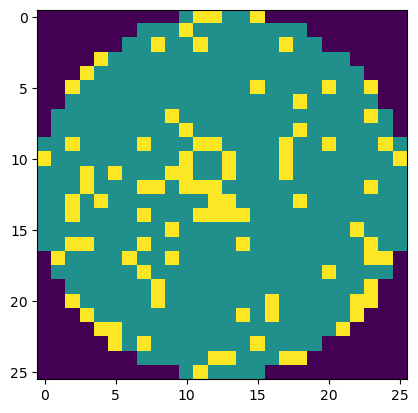

In [8]:
# 必要なライブラリをインポート
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd # https://pandas.pydata.org/
from myLabeling import myLabeling
from myThinning import MyThinning
from myOpenClose import MyOpenClose

import random

df = pd.read_pickle("../input/LSWMD_25519.pkl")
# original_image = df.waferMap[8499] # Scratch
# original_image = df.waferMap[452] # Edge-Ring
# original_image = df.waferMap[14353] # Scratch
original_image = df.waferMap[8481] # Scratch
# original_image = df.waferMap[0] # Loc
# original_image = df.waferMap[3335] # Loc

# + random
index = random.randint(0, len(df.waferMap))
original_image = df.waferMap[index]
print(df.failureType[index])
# - random

trans_image = myLabeling.preprocess(original_image)
trans_image = np.where(trans_image < 2, 0, 2)
trans_image = MyOpenClose.closing(trans_image)
trans_image = MyOpenClose.opening(trans_image)
nonzero_cnt = np.count_nonzero(trans_image)
plt.imshow(trans_image)
plt.show()
thinning_image = MyThinning().thinning(trans_image)
nonzero_cnt2 = np.count_nonzero(thinning_image)
print(nonzero_cnt2 / nonzero_cnt)
plt.imshow(thinning_image)
plt.show()
plt.imshow(original_image)
plt.show()